# Capstone Modul 2 : *Supermarket Customers*

Sufriana
JCDS-2404003

<div style="text-align: center;">
    <img src="depositphotos_645751410-stock-illustration-supermarket-aisle-perspective-view-vector.jpg" alt="depositphotos_645751410-stock-illustration-supermarket-aisle-perspective-view-vector" width="600" height="400">
</div>

ref: https://st5.depositphotos.com/3877249/64575/v/1600/depositphotos_645751410-stock-illustration-supermarket-aisle-perspective-view-vector.jpg

### **Latar Belakang**

Supermarket modern beroperasi di lingkungan yang sangat kompetitif dan terus berkembang. Dalam upaya untuk tetap relevan dan menarik pelanggan, supermarket harus memahami perilaku konsumen, preferensi belanja, dan efektivitas kampanye pemasaran mereka. Data pelanggan merupakan aset yang sangat berharga dalam menyediakan wawasan yang diperlukan untuk pengambilan keputusan yang berbasis data.
<br>

Data pelanggan ini mencakup berbagai aspek seperti demografi, status pernikahan, pendidikan, pendapatan, serta perilaku belanja. Selain itu, data ini juga mencatat interaksi pelanggan dengan berbagai kampanye pemasaran yang dijalankan oleh supermarket. Dengan menganalisis data ini, supermarket dapat mengidentifikasi pola, dan preferensi pelanggan yang dapat digunakan untuk merancang strategi pemasaran yang lebih efektif dan personalisasi layanan.
<br>


### **Problem Statement**

Berdasarkan latar belakang ini, saya mengidentifikasi beberapa masalah yang perlu diselesaikan dalam upaya meningkatkan strategi pemasaran dan pengalaman pelanggan:

1. Identifikasi segmen pasar yang berbeda berdasarkan kategori yang relevan dan rentang waktu.
    - Apakah terdapat pengaruh antara usia dan minat dalam berbelanja?
    - Apakah pelanggan yang sudah menikah cenderung melakukan pembelian yang lebih besar daripada pelanggan yang belum menikah?
    
2. Identifikasi segmen pelanggan ("Pendidikan","Usia","Status Perkawinan") yang merespon Campaign dengan baik dan menggunakan berbagai kanal pembelian.
    - Apa saja segmentasi pelanggan yang merespon campaign dengan baik?
    - Apa saja segmentasi pelanggan yang menggunakan kanal pembelian berupa web, toko, dan katalog?<br>


Stakeholder terkait dalam analisis ini adalah tim Business Development






### **Goals** 
Tujuan analisis ini adalah untuk mengidentifikasi segmen pasar berdasarkan kategori produk yang relevan, serta menganalisis dampak campaign pemasaran untuk meningkatkan efektivitas strategi pemasaran dan pengalaman pelanggan di supermarket.

 **IMPORT LIBRARY**

Import library yang akan digunakan dalam proses analisa data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

## **Data**
Dataset Supermarket Customer berisi 29 kolom terkait demografi, jenis produk, jumlah promosi yang dikirim, dan tempat pelanggan berbelanja setelah diberi promosi. Secara lengkap, berikut adalah deskripsi seluruh kolom data yang terdapat dalam database:


**People**




|Column Name | Description|
|----------|------------|
|ID | Pengidentifikasi unik pelanggan|
|Year_Birth | Tahun kelahiran pelanggan|
|Education | Tingkat pendidikan pelanggan|
|Marital_Status | Status perkawinan pelanggan|
|Income | Pendapatan rumah tangga tahunan pelanggan|
|Kidhome | Jumlah anak dalam rumah tangga pelanggan|
|Teenhome | Jumlah remaja dalam rumah tangga pelanggan|
|Dt_Customer | Tanggal pendaftaran pelanggan dengan perusahaan|
|Recency | Jumlah hari sejak pembelian terakhir pelanggan|
|Complain | 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak|

**Product**
|Column Name | Description|
|----------|------------|
|MntWines | Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir|
|MntFruits | Jumlah yang dibelanjakan untuk buah dalam 2 tahun terakhir|
|MntMeatProducts | Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir|
|MntFishProducts | Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir|
|MntSweetProducts | Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir|
|MntGoldProds | Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir| 

**Promotion**
|Column Name | Description|
|----------|------------|
|NumDealsPurchases | Jumlah pembelian yang dilakukan dengan diskon|
|AcceptedCmp1 | 1 jika pelanggan menerima tawaran di kampanye pertama, 0 sebaliknya|
|AcceptedCmp2 | 1 jika pelanggan menerima tawaran di kampanye kedua, 0 sebaliknya
|AcceptedCmp3 | 1 jika pelanggan menerima tawaran di kampanye ketiga, 0 sebaliknya|
|AcceptedCmp4 | 1 jika pelanggan menerima tawaran di kampanye keempat, 0 sebaliknya
|AcceptedCmp5 | 1 jika pelanggan menerima tawaran di kampanye kelima, 0 sebaliknya|
|Response | 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 sebaliknya|


**Place**
|Column Name | Description|
|----------|------------|
|NumWebPurchases | Jumlah pembelian yang dilakukan melalui situs web perusahaan|
|NumCatalogPurchases | Jumlah pembelian yang dilakukan menggunakan katalog
|NumStorePurchases | Jumlah pembelian yang dilakukan langsung di toko|
|NumWebVisitsMonth | Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

## **Load Dataset**

In [2]:
# Import Dataset
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## **Data Understanding dan Cleaning**

Sebelum masuk ke tahap analisis, penting untuk memahami lebih dalam dataset kita melalui tahap *data understanding*. Dari tahap ini, kita dapat mengidentifikasi anomali yang ada dalam dataset dan perlu ditangani melalui *data cleaning*. Setiap penanganan anomali akan disertai dengan justifikasi yang kuat, baik dari segi pengetahuan *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset `Supermarket Customers`.

In [3]:
# Melihat Jumlah Baris dan Kolom
df.shape

(2240, 29)

In [4]:
# Menampilkan Informasi yang ada didalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
#Mencari tahu nama kolom, jumlah unique value, dan unique value
pd.set_option('display.max_colwidth', None)
list_item = []

for column in df.columns:
    list_item.append([column,df[column].nunique(), df[column].unique()])

table_unique = pd.DataFrame(data=list_item, columns=['Nama Kolom','Jumlah Unique Value', 'Unique Value'], )

table_unique

,Nama Kolom,Jumlah Unique Value,Unique Value
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 

## *Missing Value*

In [7]:
# Melihat Missing Value disetiap Kolom 
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Menampilkan Persentase Missing Value ditiap Kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

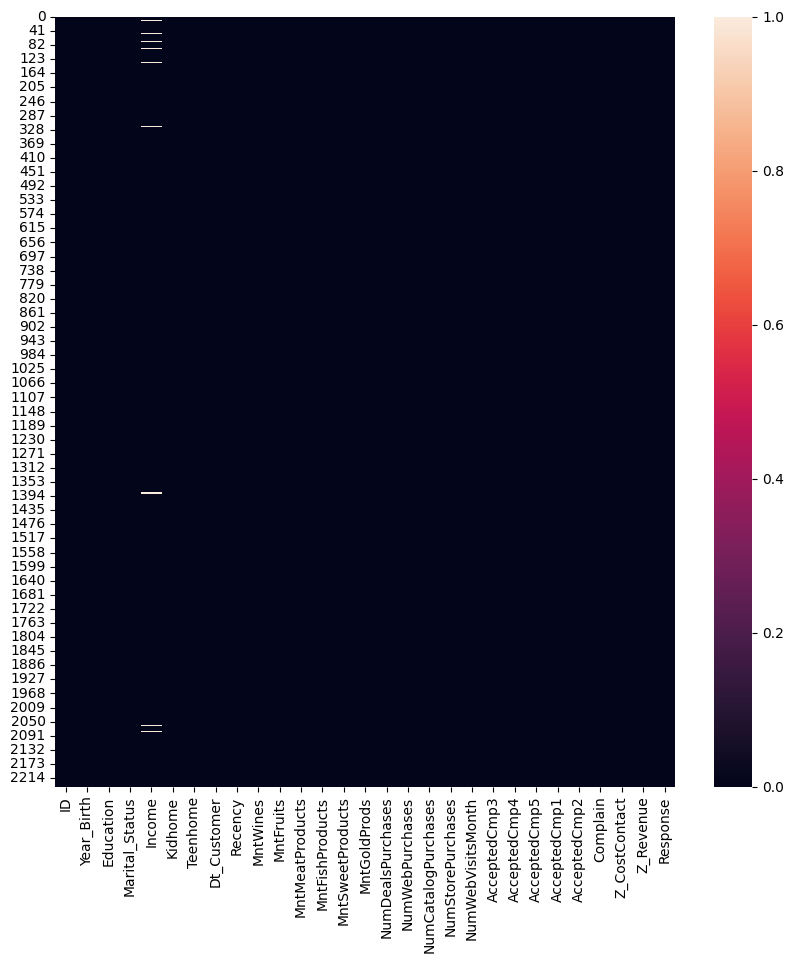

In [9]:
# Sebaran Missing Value didalam Data
plt.figure(figsize=(10,10))
sns.heatmap(df[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency',
                'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
                'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
                'Complain','Z_CostContact','Z_Revenue','Response']].isna())

In [10]:
# Melihat Unique Value di Kolom Martial_Status
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Secara umum, pada tahap "Data Understanding", kita dapat menyimpulkan bahwa terdapat beberapa informasi dalam dataset yang kurang akurat dan memerlukan penanganan lebih lanjut untuk mengoptimalkan hasil analisis. Beberapa di antaranya adalah:
- Pada Dataset `Supermarket Customers` memiliki 2.240 baris dan 29 kolom.
- Kolom `Education` terdapat 3 value yang kurang dimengerti oleh kalangan umum, seperti "Graduation", "Basic", dan "2n Cycle". Berdasarkan hasil riset yang ada 'Graduation' bisa dikategorikan sebagai kalangan "Bachelor", Basic adalah kalangan pendidikan dasar atau High School, dan 2n Cycle kalangan "Master".
- Kolom `Marital_Status` terdapat value dengan makna yang tidak berhubungan dengan nama kolom seperti (Absurd, YOLO)
- Kolom `Income` terdapat data kosong sebanyak 24 baris.
- Kolom `Dt_Customers` terdapat dtype yang tidak sesuai (object).
- Kolom `Z_CostContact` dan `Z_Revenue` memiliki value yang sama di tiap baris dan value di dalamnya tidak dapat diinterpretasikan dengan baik. Oleh karena itu, diasumsikan bahwa kedua kolom ini tidak relevan dan dapat dihapus dari dataset.


## **Data Preparation**


Dalam tahap "Data Preparation" ini, fokus utama adalah memastikan bahwa setiap langkah yang diambil menghasilkan data yang konsisten, bersih, dan siap untuk analisis lebih lanjut.

- ### Handling Format Error

In [11]:
# Mengubah Tipe Data Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'] 

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [12]:
# Merapikan Kolom Education
df['Education']=df['Education'].replace({'2n Cycle':'Master', 'Graduation':'Bachelor'})

In [13]:
df['Education'].value_counts()

Education
Bachelor    1127
Master       573
PhD          486
Basic         54
Name: count, dtype: int64

In [14]:
# Menghapus Data Pelanggan dengan Marital_Status 'Absurd' dan 'YOLO'
df = df.drop(df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')].index)
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [15]:
# Mengubah Alone Jadi Single
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

In [16]:
# Mengubah Kolom Martial_Status dengan Unique Value Married dan Single

df['Marital_Status'] = df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Married',
    'Divorced': 'Married',
    'Widow': 'Married'})

df['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

In [17]:
# Merapikan Value Pada Kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

In [18]:
df['Marital_Status'].value_counts()

Marital_Status
Married    1753
Single      483
Name: count, dtype: int64

In [19]:
# Mengubah Nama Kolom Response Menjadi AcceptedCmp6
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace= True)

In [20]:
# Menghapus Kolom Z_CostContact dan Z_Revenue
df.drop(['Z_CostContact', 'Z_Revenue'], axis= 1, inplace = True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Bachelor,Married,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


- ### Handling Missing Value

In [21]:
#Menghapus Data Pelanggan dengan Income NaN
df.dropna(subset=['Income'],inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Bachelor,Married,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


Berdasarkan hasil analisa pada tahap "Data Understanding" diterapkan beberapa perubahan pada tahap "Data Preparation", diantaranya:
- Kolom `Education` kita akan menggambungkan value "2n Cycle" menjadi "Master" dan "Graduation" menjadi "Bachelor".
- Kolom `Marital_Status` menghapus value "Absurd" dan "YOLO", setelah itu mengganti value "Alone" menjadi "Single", dan value "Together","Divorced","Widow" menjadi "Married".
- Kolom `Income` terdapat proporsi hanya sebesar 1% dari keseluruhan data, maka data tersebut dihapus, agar analisa yang didapat lebih akurat.
- Kolom `Dt_Customer` merubah format data menjadi datetime.
- Menghapus kedua kolom `Z_CostContact` dan `Z_Revenue`.
- Nama kolom `Response` diubah menjadi `AcceptedCmp6`.
    

- ### Membuat Kolom

In [22]:
# Membuat Kolom Age
df['Age']=(df['Dt_Customer'].dt.year-df['Year_Birth'])

In [23]:
# Membuat Kolom Total Campaign 
df["TotalAcceptedCmp"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp6']


In [24]:
# Membuat Kolom Num Child (No Child)
df['Num_Child'] = df['Kidhome'] + df['Teenhome']

In [25]:
# Membuat Kolom Child (Has Child)
df['Child'] = df.apply(lambda row: '1' if row['Kidhome'] != 0 or row['Teenhome'] != 0 else '0', axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,TotalAcceptedCmp,Num_Child,Child
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,55,1,0,0
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,60,0,2,1
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,48,0,0,0
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,30,0,1,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,33,0,1,1



#### **Data Duplikat**

In [26]:
# Menampilkan Data Duplikat
pd.DataFrame(df[df.duplicated()])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,TotalAcceptedCmp,Num_Child,Child


Pada tahap "Data Duplikat ", tidak ditemukan kolom dengan value yang duplikat.

#### **Klasifikasi Jenis Tipe Kolom**

In [27]:
# Klasifikasi Jenis Tipe Kolom Data
categorical_columns = ['Education', 'Marital_Status','IncomeClass','Generation','preferredPlatform']

binary_columns = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
                     'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth']

datetime_columns = ["Dt_Customer"]

### **Uji Normalitas**

In [28]:
df.select_dtypes(include=['number']).columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Age',
       'TotalAcceptedCmp', 'Num_Child'],
      dtype='object')

In [29]:
# Melihat Kolom Numerik yang Akan Dilakukan Uji Normalitas

numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

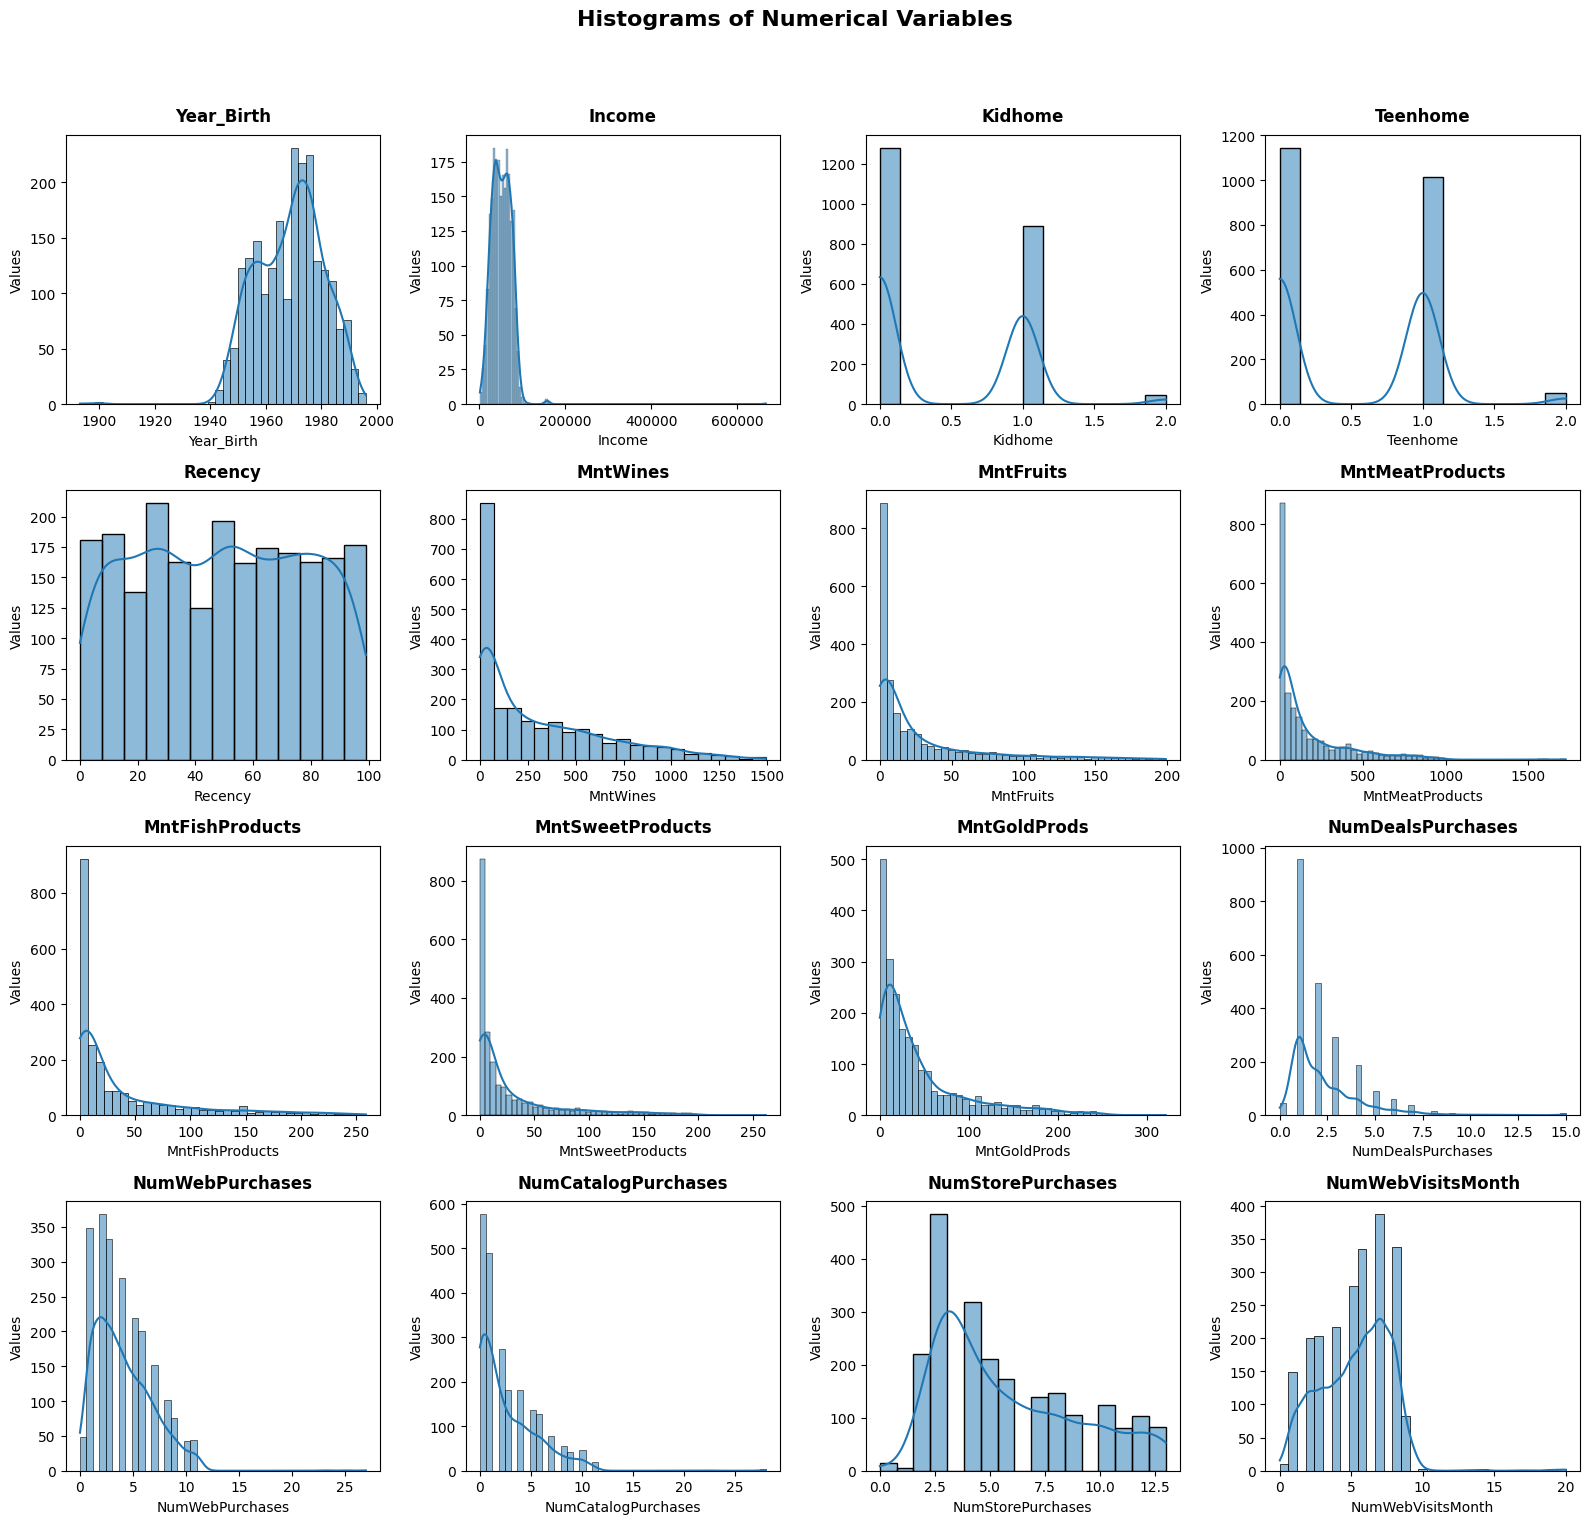

In [30]:
# Create subplots 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

# Plot Histogram untuk Setiap Kolom Numerik
for i, col in enumerate(numerical_columns):
    if i < len(axes):
        sns.histplot(data=df, x=col, ax=axes[i], kde=True)
        axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Values')

plt.suptitle('Histograms of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [31]:
from scipy.stats import shapiro

for column in  numerical_columns:
    stat,p = shapiro(df[column].dropna())
    alpha = 0.05
    if p > alpha:
        print(f"Kolom '{column}' terdistribusi normal (p-value: {p:.4f})")
    else:
        print(f"Kolom '{column}' tidak terdistribusi normal (p-value: {p:.4f})")

Kolom 'Year_Birth' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Income' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Kidhome' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Teenhome' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Recency' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntWines' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntFruits' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntMeatProducts' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntFishProducts' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntSweetProducts' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntGoldProds' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumDealsPurchases' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumWebPurchases' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumCatalogPurchases' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumStorePurchases' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Nu


Berdasarkan hasil analisa pada tahap "Uji Normalitas", diketahui bahwa seluruh kolom numerik pada dataset terdistribusi tidak normal.

### **Handling Outlier**

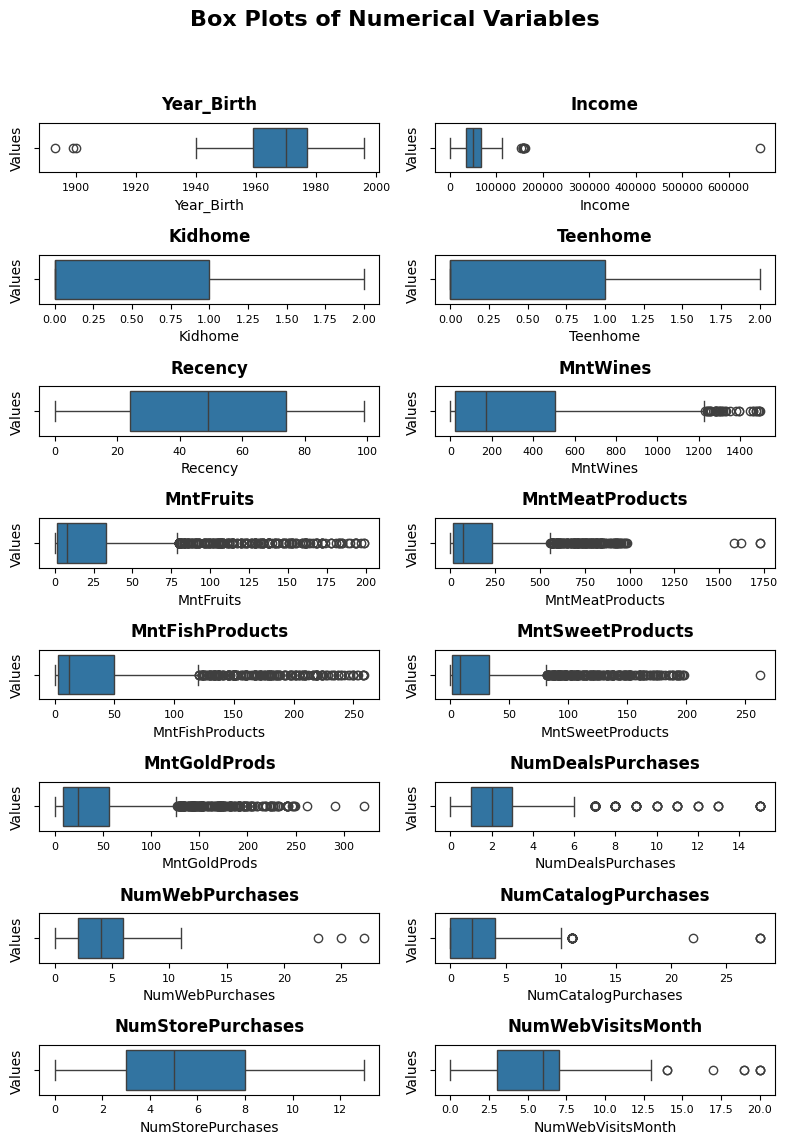

In [32]:
# Create subplots 
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, 12))
axes = axes.flatten()

# Plot boxplot for each numeric column
for i, col in enumerate(numerical_columns):
    if i < len(axes):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Values')

            # Perkecil ukuran tulisan sumbu x
        axes[i].tick_params(axis='x', labelsize=8)

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [33]:
# Melihat Data Outlier Year_Birth
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR
outliers = df[(df['Year_Birth'] < outlier_threshold_low) | (df['Year_Birth'] > outlier_threshold_high)]
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,TotalAcceptedCmp,Num_Child,Child
192,7829,1900,Master,Married,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,1,0,113,0,1,1
239,11004,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,121,0,1,1
339,1150,1899,PhD,Married,83532.0,0,0,2013-09-26,36,755,...,0,1,0,0,0,0,114,1,0,0


In [34]:
# Menghapus Data Outlier Year_Birth
df.drop(outliers.index, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,TotalAcceptedCmp,Num_Child,Child
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,55,1,0,0
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,60,0,2,1
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,48,0,0,0
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,30,0,1,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,33,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,46,0,1,1
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,0,68,1,3,1
2237,7270,1981,Bachelor,Married,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,0,33,1,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,58,0,1,1


In [35]:
# Melihat Data Outlier Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR
outliers = df[(df['Income'] < outlier_threshold_low) | (df['Income'] > outlier_threshold_high)]
outliers['Income']

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

In [36]:
# Menghapus Data Outlier Income
df.drop(outliers.index, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,TotalAcceptedCmp,Num_Child,Child
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,55,1,0,0
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,60,0,2,1
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,48,0,0,0
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,30,0,1,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,33,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,46,0,1,1
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,0,68,1,3,1
2237,7270,1981,Bachelor,Married,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,0,33,1,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,58,0,1,1


Analisis pada tahap "Handling Outlier," ditemukan bahwa beberapa nilai dalam setiap kolom dataset dikategorikan sebagai "outlier." Data dengan nilai "outlier" ini kemudian diseleksi ulang untuk memisahkan data yang dianggap anomali dan dihapuskan guna meningkatkan akurasi analisis.
- Kolom `Year_Birth` terdapat data pelanggan yang lahir dibawah tahun 1920, dan dianggap sebagai Outliers, sehingga dapat menimbulkan kesalahan dalam analisis karena usia pelanggan menjadi tidak rasional. 
- Kolom `Income` terdapat data pelanggan yang memiliki Income yang sangat jauh dari rata-rata yaitu sekitar 600.000 dibandingkan dengan rata-rata Income pelanggan secara keseluruhan. Jika data ini tetap digunakan, hasil analisis tidak akan merepresentasikan keseluruhan pelanggan secara akurat. Dengan menghapus data-data anomali ini, analisis data menjadi lebih valid dan representatif.
- Untuk Outliers selain kolom `Year Birth` dan `Income` saya biarkan , karena saya asumsikan bahwa itu merupakan pembelian yang dilakukan pelanggan. Jadi, mungkin saja bahwa ada pelanggan yang melakukan total transaksi jauh diatas rata-rata.

# **Data Analisis**

Setelah melakukan tahap "Data Preparation", maka saat ini bisa dimulai analisis untuk mengetahu `identifikasi segmen pasar yang berbeda berdasarkan kategori yang relevan dan rentang waktu` dan `Identifikasi segmen pelanggan yang merespon campaign pemasaran dengan baik dalam merancang campaign yang lebih efektif`.

## 1. Identifikasi segmen pasar yang berbeda berdasarkan kategori yang relevan dan rentang waktu.


- ### `Apakah terdapat pengaruh antara usia dengan minat dalam berbelanja?`

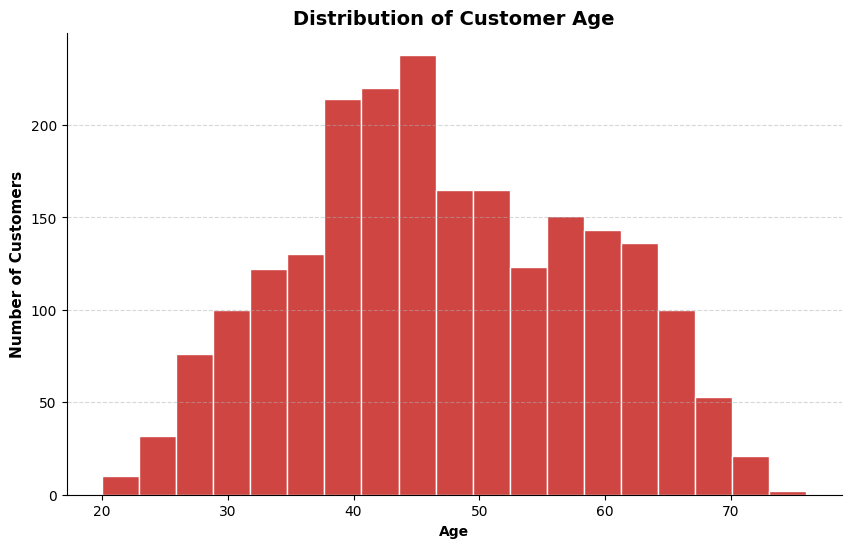

In [37]:
# Melihat distribusi usia customer
year_birth = df['Year_Birth']
current_year = 2016
# Tahun 2016 adalah tahun yang saya anggap merupakan tahun dimana data dikumpulkan, karena data terakhir pelanggan ada pada tahun 2014, sedangkan data yang ada diinfokan merupakan data dua tahun berjalan. 
# Sehingga saya mengambil tahun 2016 sebagai patokan range waktunya.
age = current_year - year_birth

plt.figure(figsize=(10, 6))
sns.histplot(data=age, bins=19, kde=False, edgecolor='white', color='#bf0603')
plt.xlabel('Age', fontsize=10, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=11, fontweight='bold')
plt.title('Distribution of Customer Age', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine() 
plt.show()

Disini terlihat bahwa range usia untuk pelanggan dalam data ini adalah dibawah 80 tahun. 

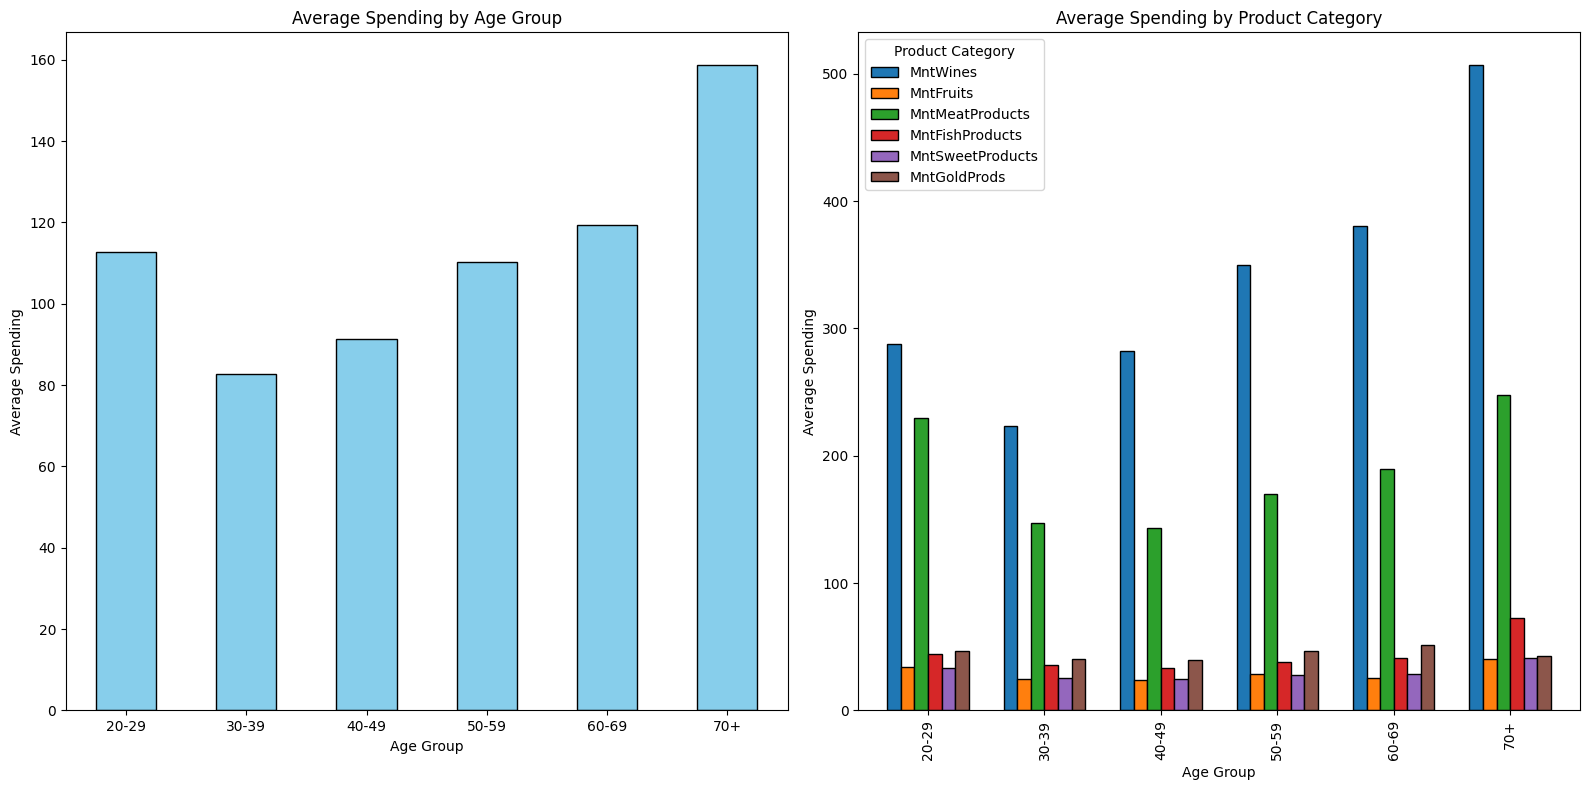

In [38]:
# Menghitung usia dan mengelompokkan berdasarkan kelompok usia
df['Age'] = 2016 - df['Year_Birth']
bins = [20, 30, 40, 50, 60, 70, 130]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Menghitung rata-rata pengeluaran berdasarkan kelompok usia
grouped_df = df.groupby('Age_Group')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
grouped_df['Average_Spending'] = grouped_df.mean(axis=1)

# Membuat plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot pengeluaran rata-rata
grouped_df['Average_Spending'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Average Spending')
axes[0].set_title('Average Spending by Age Group')
axes[0].tick_params(axis='x', labelrotation=0)

# Plot pengeluaran per kategori produk
product_preferences = df.groupby('Age_Group')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
product_preferences.plot(kind='bar', ax=axes[1], width=0.7, edgecolor='black')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Average Spending')
axes[1].set_title('Average Spending by Product Category')
axes[1].legend(title='Product Category')

plt.tight_layout()
plt.show()


### **Insight**
- Kelompok usia 70+ memiliki rata-rata pembelanjaan tertinggi dan menunjukkan minat yang tinggi terhadap berbagai kategori produk. </br>
Data menunjukkan bahwa orang-orang dalam kelompok usia ini cenderung mengeluarkan lebih banyak uang untuk berbelanja, menunjukkan minat yang tinggi terhadap berbagai produk.
- Preferensi produk yang paling dominan adalah wine dan daging. </br>
Di antara berbagai produk yang tersedia, wine dan daging adalah produk yang paling sering dibeli oleh kelompok usia 70+, menunjukkan preferensi yang jelas terhadap jenis produk ini.
- Minat terhadap produk ikan, buah, dan jajanan manis sangat rendah dibandingkan dengan wine dan daging, kelompok usia 70+ menunjukkan minat yang jauh lebih rendah terhadap produk ikan, buah, dan jajanan manis.
- Pembelian emas lebih tinggi dibandingkan dengan produk-produk lainnya(ikan,buah,dan jajanan manis). </br>
Emas digunakan sebagai aksesoris cantik dan sebagai bentuk investasi yang diminati. Selain digunakan sebagai aksesoris, emas juga dipandang sebagai investasi yang berharga, yang mungkin menjelaskan tingginya tingkat pembelian emas.
- Perlu dievaluasi apakah masalah terjadi pada produk itu sendiri atau pada pemasarannya yang kurang efektif. </br>
Rendahnya minat terhadap produk ikan, buah, dan jajanan manis mungkin disebabkan oleh masalah dengan produk tersebut atau strategi pemasaran yang tidak efektif. Evaluasi lebih lanjut diperlukan untuk menentukan penyebab pastinya.

- ### `Apakah pelanggan yang sudah menikah cenderung melakukan pembelian yang lebih besar daripada pelanggan yang belum menikah?`

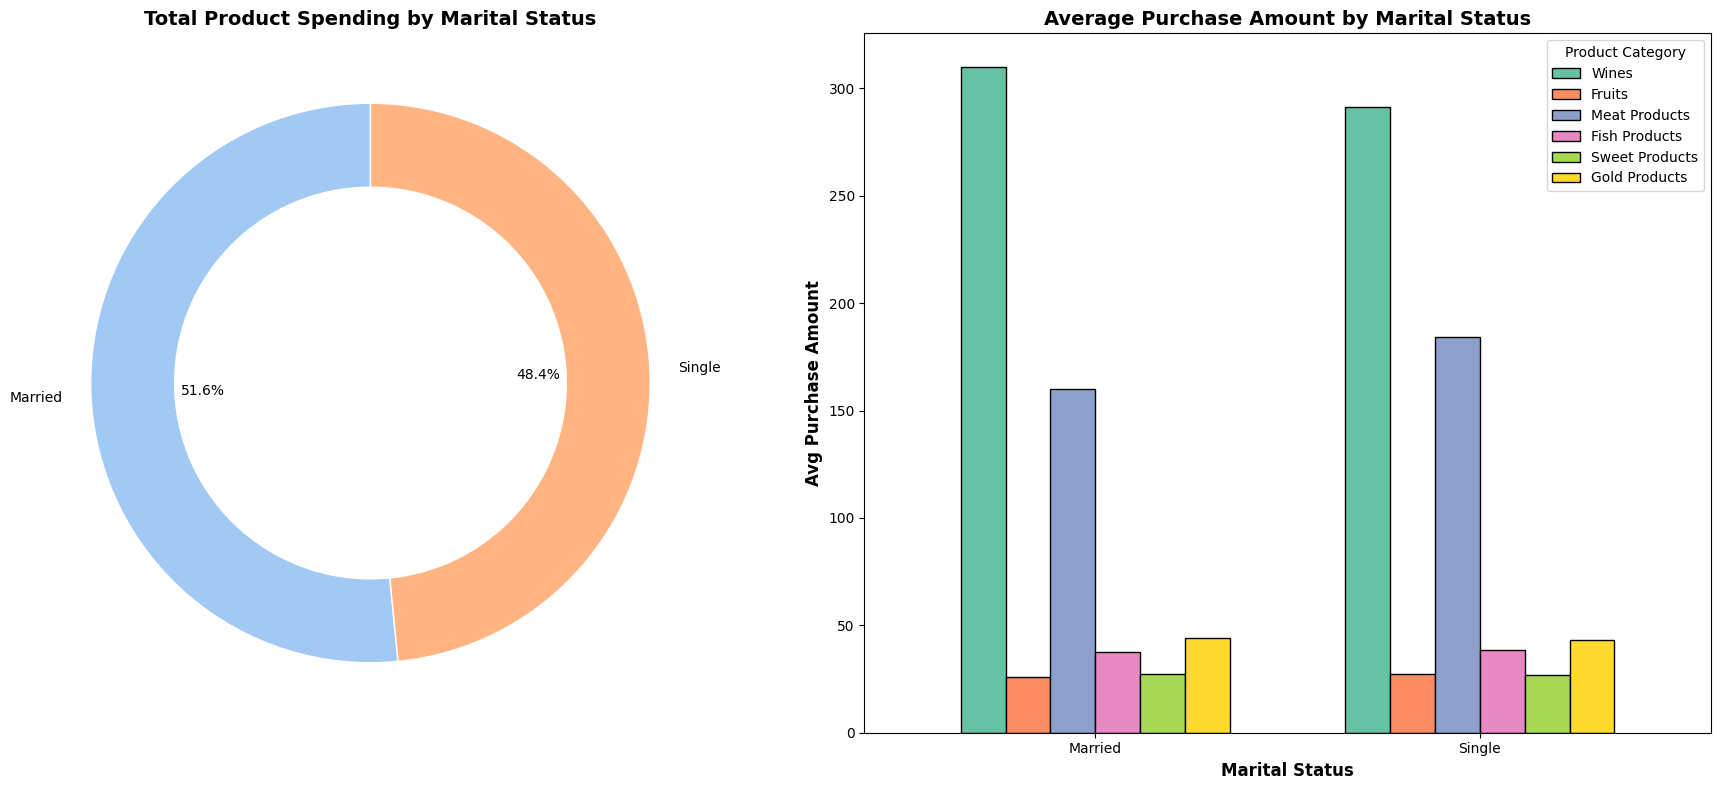

In [39]:
# Menghitung rata-rata pengeluaran berdasarkan status perkawinan
purchase_totals = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Warna untuk pie chart
colors = sns.color_palette('pastel')[0:3]
wedgeprops = {'width': 0.3, 'edgecolor': 'white'}
axes[0].pie(purchase_totals['MntWines'], labels=purchase_totals.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[0].set_title('Total Product Spending by Marital Status', fontsize=14, fontweight='bold')

# Warna untuk bar chart
colors = sns.color_palette('Set2')
product_preferences = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
legend_labels = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']

product_preferences.plot(kind='bar', ax=axes[1], width=0.7, color=colors, edgecolor='black')
axes[1].set_xlabel('Marital Status', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Avg Purchase Amount', fontsize=12, fontweight='bold')
axes[1].set_title('Average Purchase Amount by Marital Status', fontsize=14, fontweight='bold')
axes[1].legend(legend_labels, title='Product Category', fontsize=10)
axes[1].tick_params(axis='x', labelrotation=0, labelsize=10)

plt.tight_layout()
plt.show()


### **Insight**
- Pelanggan yang sudah menikah cenderung melakukan pembelian yang lebih besar daripada pelanggan yang belum menikah.<br>
Meskipun perbedaannya tidak terlalu signifikan, data menunjukkan bahwa pelanggan yang sudah menikah biasanya menghabiskan lebih banyak uang untuk berbelanja dibandingkan dengan yang belum menikah.<br>
- Pelanggan yang belum menikah masih melakukan pembelian dalam jumlah yang cukup banyak.<br>
Meskipun memiliki kebutuhan yang lebih sedikit, pelanggan yang belum menikah masih berbelanja dalam jumlah yang cukup banyak, kemungkinan karena mereka tinggal bersama teman atau keluarga.
- Secara keseluruhan, tidak ada perbedaan yang signifikan antara kedua kategori tersebut.<br>
Kedua kategori pelanggan (menikah,dan belum menikah) menunjukkan pola pembelian yang tidak jauh berbeda, dengan wine dan daging tetap menjadi produk favorit bagi mereka.

`Lalu bagaimana pola pembelanjaan jika pelanggan supermarket memiliki anak?`

In [40]:
purchase_has_child = df.groupby('Child').agg({
    'MntWines': 'mean',
    'MntMeatProducts': 'mean',
    'MntGoldProds': 'mean',
    'MntFishProducts': 'mean',
    'MntFruits': 'mean',
    'MntSweetProducts': 'mean'
})

purchase_num_child = df.groupby('Num_Child').agg({
    'MntWines': 'mean',
    'MntMeatProducts': 'mean',
    'MntGoldProds': 'mean',
    'MntFishProducts': 'mean',
    'MntFruits': 'mean',
    'MntSweetProducts': 'mean'
})

display(purchase_has_child, purchase_num_child)

,MntWines,MntMeatProducts,MntGoldProds,MntFishProducts,MntFruits,MntSweetProducts
Child,,,,,,
0,491.094249,367.765176,63.932907,76.619808,52.330671,53.565495
1,232.579683,84.804444,35.956825,22.139683,16.053968,16.646984


,MntWines,MntMeatProducts,MntGoldProds,MntFishProducts,MntFruits,MntSweetProducts
Num_Child,,,,,,
0,491.094249,367.765176,63.932907,76.619808,52.330671,53.565495
1,269.547748,98.286486,40.668468,26.945946,19.565766,20.279279
2,142.284337,51.778313,25.503614,11.306024,7.874699,8.325301
3,161.340000,59.620000,18.120000,5.360000,5.980000,5.080000


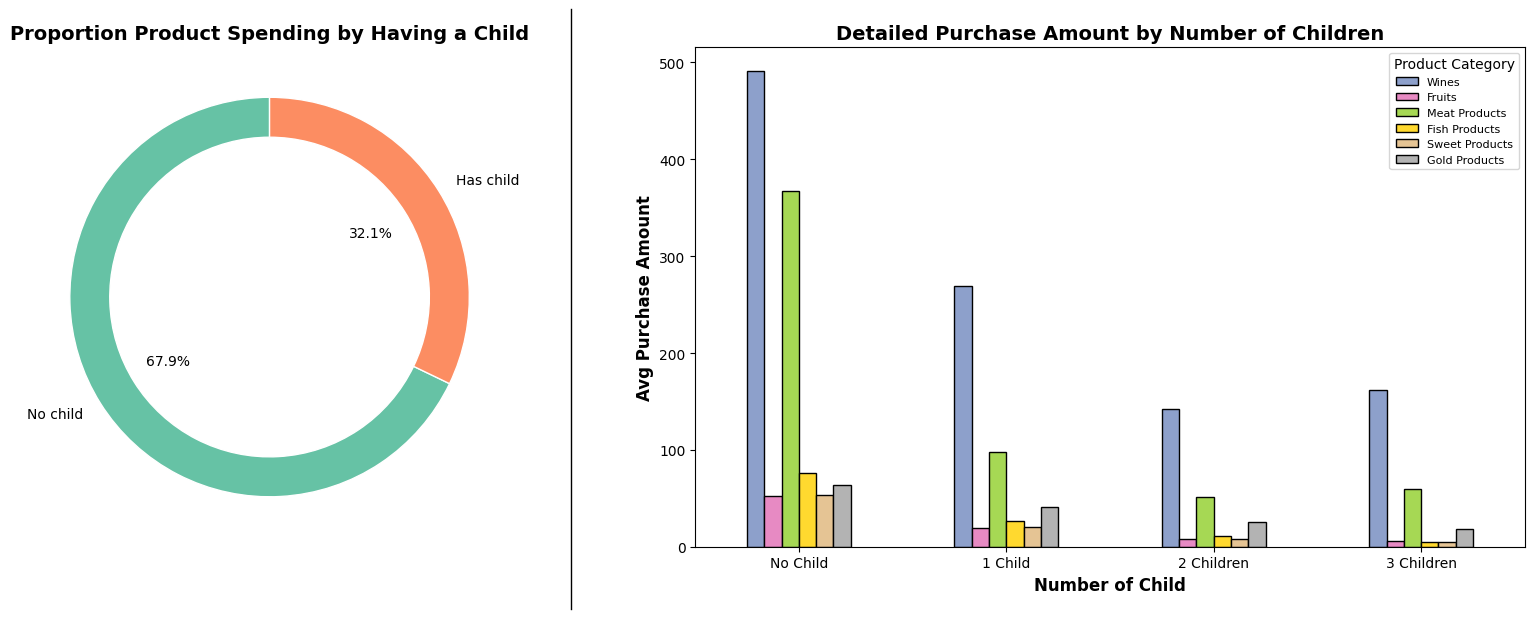

In [41]:
# Group by 'Child' and calculate mean spending for each product category
spending_totals = df.groupby('Child')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
spending_totals.index = spending_totals.index.map({'1': 'Has child', '0': 'No child'})

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Define new colors for the pie chart
colors_pie = ['#66c2a5', '#fc8d62']
wedgeprops = {'width': 0.2, 'edgecolor': 'white'}
axes[0].pie(spending_totals['MntWines'], labels=spending_totals.index, colors=colors_pie, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[0].figure.set_size_inches(16, 7)
axes[0].set_title('Proportion Product Spending by Having a Child', fontsize=14, fontweight='bold')

# Group by 'Num_Child' and calculate mean spending for each product category
numChild_spending = df.groupby('Num_Child')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Define new colors for the bar chart
colors_bar = ['#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']
legend_labels = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']
numChild_spending.plot(kind='bar', ax=axes[1], width=0.5, color=colors_bar, position=0.5, edgecolor='black')
axes[1].figure.set_size_inches(17, 6)
axes[1].set_xlabel('Number of Child', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(['No Child', '1 Child', '2 Children', '3 Children'])
axes[1].set_ylabel('Avg Purchase Amount', fontsize=12, fontweight='bold')
axes[1].set_title('Detailed Purchase Amount by Number of Children', fontsize=14, fontweight='bold')
axes[1].legend(labels=legend_labels, title='Product Category', fontsize=8, loc='upper right')
axes[1].tick_params(axis='x', labelrotation=0, labelsize=10)

# Add vertical line to separate the plots
fig.add_artist(plt.Line2D([0.43, 0.43], [0, 1], color='black', linewidth=1, linestyle='-'))
plt.tight_layout()
plt.show()


### **Insight**

- Keberadaan anak dapat mempengaruhi pola pembelian tertentu seperti wine, daging, dan emas, dengan terlihatnya penurunan pembelian seiring bertambahnya jumlah anak.
- Namun, untuk produk seperti ikan, buah-buahan, dan produk manis, faktor keberadaan anak tidak menunjukkan dampak yang signifikan terhadap jumlah rata-rata pembelian.
- Analisis ini memberikan wawasan tentang bagaimana pola pembelian konsumen dapat bervariasi berdasarkan keberadaan dan jumlah anak dalam keluarga, yang penting untuk dipertimbangkan dalam strategi pemasaran dan penentuan target pasar.

## 2. Identifikasi segmen pelanggan ("Pendidikan","Usia","Status Perkawinan") yang merespon Campaign dengan baik dan menggunakan berbagai kanal pembelian.
  

  - ### `Apa saja segmentasi pelanggan yang merespon campaign dengan baik?`

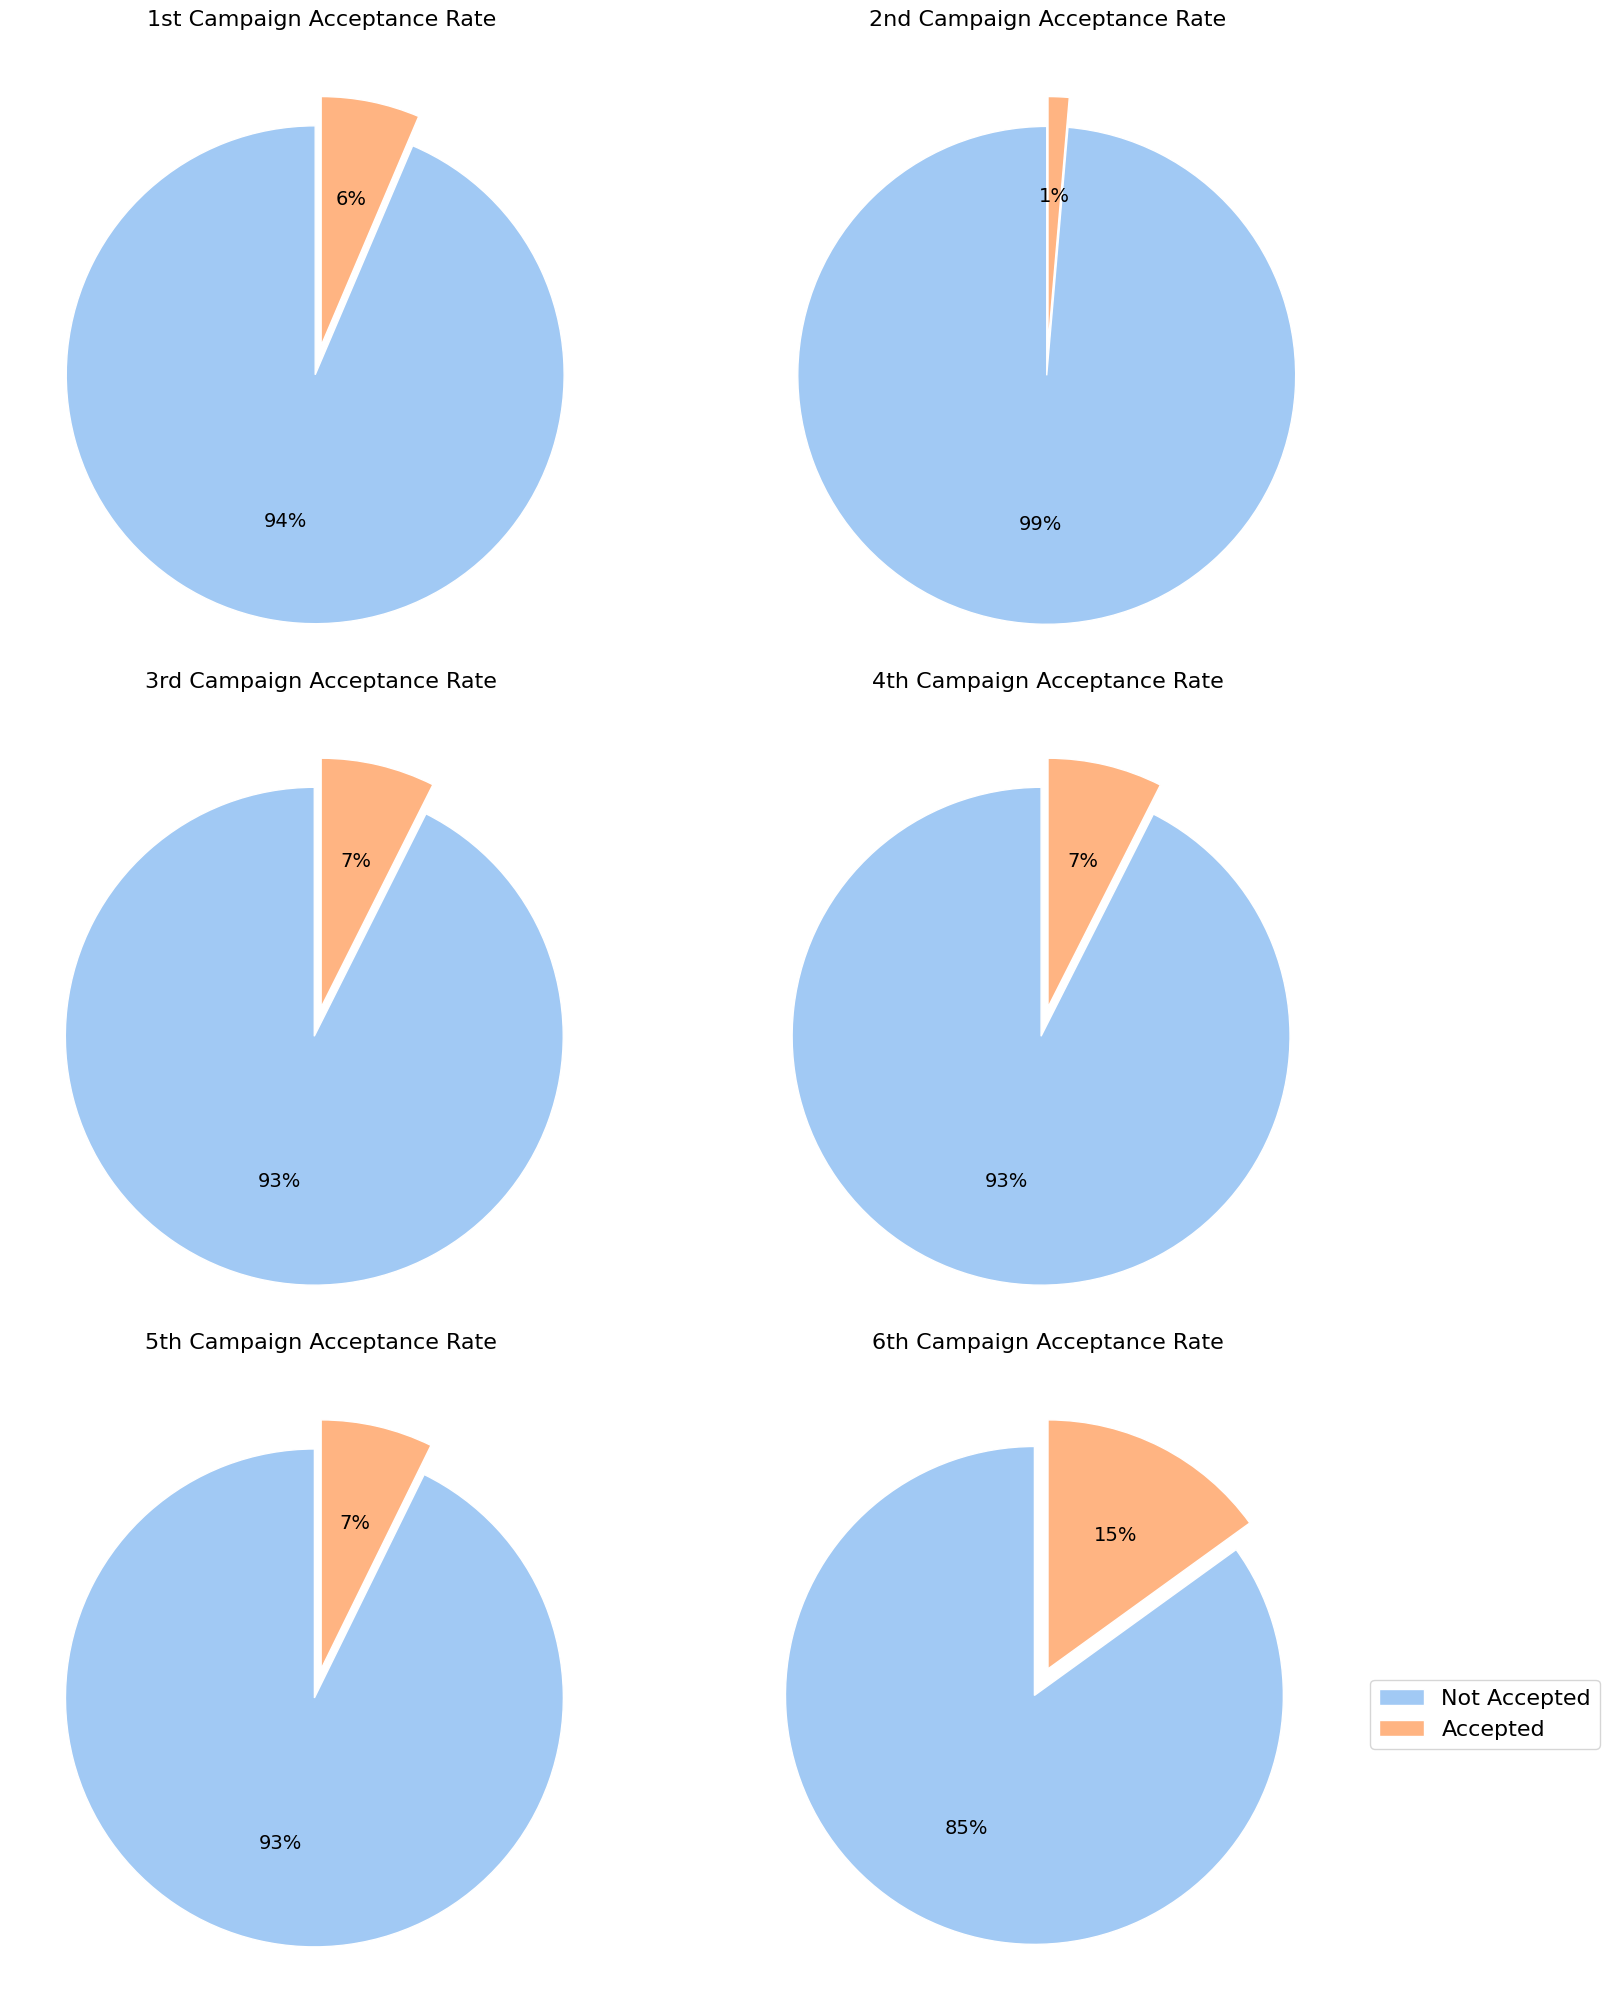

In [42]:
campaignColumns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

plt.figure(figsize=(18, 20))  # Ubah ukuran gambar

for i, campaignColumn in enumerate(campaignColumns, start=1):
    plt.subplot(3, 2, i)
    
    plt.pie(df[campaignColumn].value_counts(),
            autopct='%.f%%',
            colors=sns.color_palette('pastel'),  # Ubah palet warna 
            startangle=90,
            explode=[0.12, 0],
            textprops={'fontsize': 14},  # Atur ukuran teks dalam potongan pie
            wedgeprops={'edgecolor': 'white'})  # Tambahkan properti untuk warna garis pinggir
    
    plt.title(f'{i}{"st" if i==1 else "nd" if i==2 else "rd" if i==3 else "th"} Campaign Acceptance Rate', fontsize=16)  # Atur ukuran teks judul
    
plt.legend(labels=['Not Accepted', 'Accepted'],
           bbox_to_anchor=(1, 0.5), fontsize=16)  # Atur ukuran teks legenda

plt.tight_layout()  # Menyesuaikan layout agar subplot tidak tumpang tindih
plt.show()


In [43]:
hasil = df[df['TotalAcceptedCmp'] > 0][['Education', 'Age_Group', 'Marital_Status']].value_counts().head(10)
hasil_df = hasil.reset_index()
hasil_df

,Education,Age_Group,Marital_Status,count
0,Bachelor,40-49,Married,67
1,Bachelor,50-59,Married,51
2,Bachelor,30-39,Married,50
3,Bachelor,60-69,Married,40
4,PhD,40-49,Married,38
5,Master,40-49,Married,34
6,Master,60-69,Married,30
7,PhD,50-59,Married,30
8,PhD,60-69,Married,23
9,Master,30-39,Married,22


In [44]:
hasil = df[df['NumDealsPurchases'] > 0][[ 'Education', 'Age_Group', 'Marital_Status']].value_counts().head(10)
hasil_df = hasil.reset_index()
hasil_df

,Education,Age_Group,Marital_Status,count
0,Bachelor,40-49,Married,277
1,Bachelor,30-39,Married,191
2,Bachelor,50-59,Married,188
3,Master,40-49,Married,149
4,Bachelor,60-69,Married,143
5,PhD,40-49,Married,136
6,Master,50-59,Married,92
7,PhD,50-59,Married,91
8,Master,30-39,Married,89
9,Master,60-69,Married,89


### **Insight**
Campaign keenam menunjukkan tingkat penerimaan yang jauh lebih tinggi dibandingkan yang lain. Sedangkan campaign kedua, ketiga, keempat, dan kelima memiliki tingkat penerimaan yang lebih rendah, menunjukkan perlunya evaluasi ulang strategi.

Segmentasi Pelanggan Berdasarkan campaign

- Tingkat Pendidikan:<br>
Bachelor: Kelompok yang paling Cepat merespons dengan campaign tertinggi, terutama di kelompok usia 40-49 tahun.<br>
Master: Juga menunjukkan responsivitas yang signifikan, terutama di kelompok usia 40-49 dan 50-59 tahun.<br>
PhD: Kelompok yang paling tidak Cepat merespons secara keseluruhan tetapi masih memiliki keterlibatan yang berarti di kelompok usia 50-59 tahun.

- Kelompok Usia:<br>
40-49: Menunjukkan responsivitas tertinggi di semua tingkat pendidikan.<br>
30-39: Juga menunjukkan responsivitas tinggi, terutama di antara pelanggan dengan gelar Bachelor.<br>
50-59: Responsivitas bervariasi, signifikan di antara pemegang gelar Bachelor dan PhD.

- Status Pernikahan:<br>
Menikah: Mendominasi kelompok yang Cepat merespons, menunjukkan kemungkinan lebih tinggi terlibat dalam campaign.

- ### `Apa saja segmentasi pelanggan yang menggunakan kanal pembelian berupa web, toko, dan katalog?`

In [45]:
# Menghitung jumlah pembelian berdasarkan kombinasi kolom
tempat = df[['Education', 'Age_Group', 'Marital_Status', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].groupby(['Education', 'Age_Group', 'Marital_Status']).sum()
tempat_df = tempat.reset_index().head(10)

# Membuat DataFrame distribusi pembelian
hasil = df[['Education', 'Age_Group', 'Marital_Status', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']]

# Membuat variabel DataFrame distribution channel
df_distribution = hasil[['Education', 'Age_Group', 'Marital_Status', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']]

# Membuat tabel jumlah pembelian pada masing-masing distribution channel setiap segmen pelanggan
distribution_segmen = df_distribution.groupby(['Education', 'Age_Group', 'Marital_Status']).sum()
distribution_segmen.loc['Total'] = distribution_segmen.sum()
distribution_segmen.head(5).reset_index()

# Reset index dan rename kolom 'index' menjadi 'Segment'
distribution_segmen.reset_index(inplace=True)
distribution_segmen.rename(columns={'index': 'Segment'}, inplace=True)

# Convert tuples in 'Segment' column to strings
distribution_segmen['Segment'] = distribution_segmen['Segment'].apply(lambda x: ', '.join(map(str, x)))

# Display the updated DataFrame
distribution_segmen_top=distribution_segmen.head(5)
distribution_segmen_top

,Segment,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
0,"Bachelor, 20-29, Married",140,263,130
1,"Bachelor, 20-29, Single",133,233,120
2,"Bachelor, 30-39, Married",736,1033,443
3,"Bachelor, 30-39, Single",186,290,105
4,"Bachelor, 40-49, Married",1224,1608,702


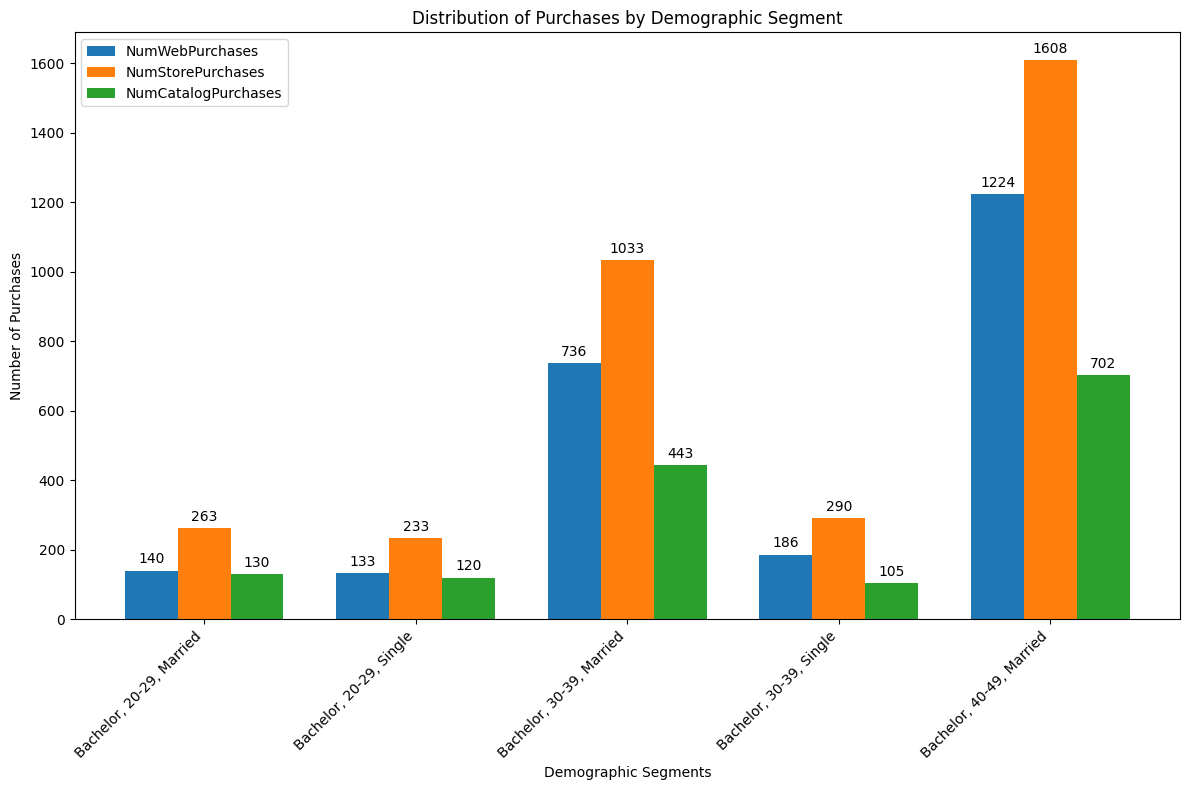

In [46]:
num_categories = len(distribution_segmen_top)

# Position of bars on x-axis
bar_width = 0.25
index = np.arange(num_categories)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
bar1 = plt.bar(index, distribution_segmen_top['NumWebPurchases'], bar_width, label='NumWebPurchases')
bar2 = plt.bar(index + bar_width, distribution_segmen_top['NumStorePurchases'], bar_width, label='NumStorePurchases')
bar3 = plt.bar(index + 2*bar_width, distribution_segmen_top['NumCatalogPurchases'], bar_width, label='NumCatalogPurchases')

# Adding labels, title, and customizing the plot
plt.xlabel('Demographic Segments')
plt.ylabel('Number of Purchases')
plt.title('Distribution of Purchases by Demographic Segment')
plt.xticks(index + bar_width, distribution_segmen_top['Segment'], rotation=45, ha='right')  # Assuming 'Segment' is the correct column name
plt.legend()

# Adding values on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords='offset points',
                     ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)

# Displaying the plot
plt.tight_layout()
plt.show()

### **Insight**
- Segment usia 20-29 tahun dengan status single memiliki jumlah pembelian web, toko, dan katalog yang lebih rendah dibandingkan dengan segment yang sudah menikah di usia yang sama. Ini menunjukkan bahwa mereka mungkin lebih sedikit berbelanja secara online, di toko, maupun melalui katalog.
  
- Segment usia 30-39 tahun menunjukkan bahwa yang sudah menikah cenderung melakukan lebih banyak pembelian di semua kanal (web, toko, katalog) dibandingkan dengan yang single. Hal ini menunjukkan kemungkinan adanya tanggung jawab keluarga yang lebih besar yang mendorong mereka untuk berbelanja lebih banyak.

- Segment usia 40-49 tahun yang sudah menikah menunjukkan jumlah pembelian yang paling tinggi di semua kategori (web, toko, katalog), menunjukkan bahwa kelompok ini memiliki kecenderungan untuk berbelanja lebih banyak secara umum, baik secara online, di toko, maupun melalui katalog.

Dengan demikian, faktor seperti usia dan status perkawinan dapat memberikan wawasan yang berharga tentang preferensi pembelian di berbagai platform pembelian, baik secara online maupun offline.

# **Kesimpulan dan Rekomendasi**

Dari analisis yang telah dilakukan, kesimpulan dan rekomendasi yang bisa diambil mengenai analisis segmentasi pasar ini adalah:

### **Kesimpulan**
1. Identifikasi segmen pasar yang berbeda berdasarkan kategori yang relevan dan rentang waktu.<br>
    - Kelompok usia 70+ di supermarket menunjukkan minat yang tinggi terhadap pembelian produk wine dan daging, namun minat terhadap produk seperti ikan, buah, dan jajanan manis sangat rendah. Mereka juga cenderung membeli emas, sebagai investasi atau aksesoris. Hal ini menyoroti perlunya strategi pemasaran yang lebih baik untuk memenuhi preferensi belanja yang beragam di kalangan konsumen senior ini.<br>
    - Tidak ada perbedaan signifikan dalam pola pembelian antara pelanggan yang sudah menikah dan yang belum menikah di supermarket. Meskipun pelanggan yang sudah menikah cenderung melakukan pembelian yang sedikit lebih besar, perbedaannya tidak terlalu mencolok. Kedua kelompok menunjukkan minat yang konsisten terhadap produk wine dan daging, menunjukkan preferensi yang serupa terhadap jenis produk ini. Hal ini menunjukkan bahwa supermarket dapat mempertahankan strategi pemasaran yang serupa untuk kedua kelompok ini, dengan fokus pada produk-produk yang diminati seperti wine dan daging, sambil mempertimbangkan preferensi individual dan strategi pemasaran yang efektif untuk memaksimalkan pengalaman belanja mereka.<br>
2. Identifikasi segmen pelanggan ("Pendidikan","Usia","Status Perkawinan") yang merespon Campaign dengan baik dan menggunakan berbagai kanal pembelian.<br>
    - Campaign yang merespon dengan baik adalah campaign keenam yang menunjukkan tingkat penerimaan yang signifikan, sementara campaign lainnya perlu evaluasi lebih lanjut untuk meningkatkan efektivitas. Pelanggan dengan gelar Bachelor dan yang menikah cenderung merespons lebih baik terhadap campaign, khususnya di kelompok usia 40-49 tahun. Analisis ini menggarisbawahi pentingnya penyesuaian strategi pemasaran berdasarkan karakteristik pendidikan, usia, dan status pernikahan untuk mencapai keterlibatan yang lebih baik dari pelanggan dalam campaign pemasaran.
    - Usia dan status perkawinan mempengaruhi pola pembelian di berbagai kanal. Pelanggan usia 20-29 tahun yang masih single cenderung berbelanja lebih sedikit di web, toko, dan katalog dibandingkan dengan seumurannya yang sudah menikah. Kelompok usia 30-39 tahun yang sudah menikah menunjukkan kecenderungan untuk berbelanja lebih banyak di semua kanal, sedangkan pelanggan usia 40-49 tahun yang sudah menikah menunjukkan pembelian tertinggi di semua kategori, menandakan keterlibatan yang tinggi dalam berbelanja online maupun offline.

### **Rekomendasi**

1. **Penyesuaian Strategi Pemasaran untuk Kelompok Usia 70+**: Berdasarkan minat yang tinggi terhadap produk wine, daging, dan emas, disarankan untuk mengoptimalkan penempatan produk dan promosi yang lebih menarik bagi konsumen senior ini. Pemasaran yang lebih personal dan fokus pada kebutuhan khusus mereka dapat meningkatkan keterlibatan dan loyalitas pelanggan.

2. **Konsistensi dalam Strategi Pemasaran untuk Pelanggan Berdasarkan Status Pernikahan**: Meskipun tidak ada perbedaan signifikan dalam pola pembelian antara pelanggan yang sudah menikah dan belum menikah, tetap diperlukan konsistensi dalam menawarkan produk-produk yang diminati seperti wine dan daging. Strategi pemasaran yang menyeluruh dan inklusif terhadap semua segmen dapat memastikan pengalaman belanja yang positif bagi semua pelanggan.

3. **Optimalisasi Campaign Berdasarkan Karakteristik Demografis**: Mengingat respons yang lebih baik dari pelanggan dengan gelar Bachelor dan yang menikah, khususnya di kelompok usia 40-49 tahun, disarankan untuk lebih fokus pada segmentasi yang tepat dalam campaign pemasaran. Evaluasi terus-menerus terhadap campaign yang ada dan adaptasi strategi berdasarkan analisis demografis dapat meningkatkan efektivitas dan *Return on Investment* (ROI) dari campaign pemasaran.

4. **Peningkatan Keterlibatan Melalui Kanal Pembelian**: Untuk meningkatkan keterlibatan pelanggan usia muda yang masih single, disarankan untuk mengeksplorasi inovasi dalam strategi pemasaran digital dan promosi yang lebih menarik untuk platform web, toko, dan katalog. Memahami preferensi dan perilaku pembelian mereka secara lebih mendalam dapat membantu supermarket mengoptimalkan penggunaan setiap kanal pembelian untuk mencapai target pasar yang lebih luas dan meningkatkan konversi.

Rekomendasi ini bertujuan untuk membantu supermarket meningkatkan efektivitas strategi pemasaran mereka, memaksimalkan pengalaman pelanggan, dan memperkuat posisi mereka di pasar yang kompetitif.

## **Save to CSV**

In [47]:
# save to csv format
df.to_csv('Cleaned_Supermarket_Customers.csv')

In [48]:
# Menyimpan dataframe dalam bentuk csv
distribution_csv = distribution_segmen_top.copy()
distribution_csv.reset_index(inplace=True)
pd.melt(distribution_csv, id_vars=['index'], var_name='Segmen_Distribution', value_name='Percentage_Distribution').to_csv('distribution.csv', index=False)

In [49]:
# Daftar kolom kampanye
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

# DataFrame baru untuk menyimpan nilai hitungan
campaign_data = pd.DataFrame()

# Menghitung nilai hitungan untuk setiap kolom kampanye
for campaign_column in campaign_columns:
    campaign_data[campaign_column] = df[campaign_column].value_counts()

# Menyimpan DataFrame baru sebagai file CSV
output_path = 'campaign_acceptance_rates.csv'
campaign_data.to_csv(output_path, index=False)